# **Student Performance Factor**

**Description of the dataset**

This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

**Student Performance Attribute Description**

1. **Hours_Studied:** Number of hours spent studying per week.
2. **Attendance:** Percentage of classes attended.
3. **Parental_Involvement:** Level of parental involvement in the student's education (Low, Medium, High).
4. **Access_to_Resources:** Availability of educational resources (Low, Medium, High).
5. **Extracurricular_Activities**: Participation in extracurricular activities (Yes, No).
6. **Sleep_Hours:** Average number of hours of sleep per night.
7. **Previous_Scores:**	Scores from previous exams.
8. **Motivation_Level:**	Student's level of motivation (Low, Medium, High).
9. **Internet_Access:** Availability of internet access (Yes, No).
10. **Tutoring_Sessions:**	Number of tutoring sessions attended per month.
11. **Family_Income:**	Family income level (Low, Medium, High).
12. **Teacher_Quality:**	Quality of the teachers (Low, Medium, High).
13. **School_Type:**	Type of school attended (Public, Private).
14. **Peer_Influence:**	Influence of peers on academic performance (Positive, Neutral, Negative).
15. **Physical_Activity:**	Average number of hours of physical activity per week.
16. **Learning_Disabilities:**	Presence of learning disabilities (Yes, No).
17. **Parental_Education_Level:**	Highest education level of parents (High School, College, Postgraduate).
18. **Distance_from_Home:**	Distance from home to school (Near, Moderate, Far).
19. **Gender:**	Gender of the student (Male, Female).
20. **Exam_Score:** Final exam score.

**The purpose of the analysis**

The portfolio is used to predict student performance factors presence in patients based on these diagnostic features.

To achieve this, several regression techniques are used to yield the best regression model.

# **Import the dataset**

In [50]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from collections import Counter


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#Read data
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

# **1. Explore the data**

In [ ]:
df.shape

(6607, 20)

In [2]:
print(len(df))

6607


In [3]:
# Univarative analysis
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


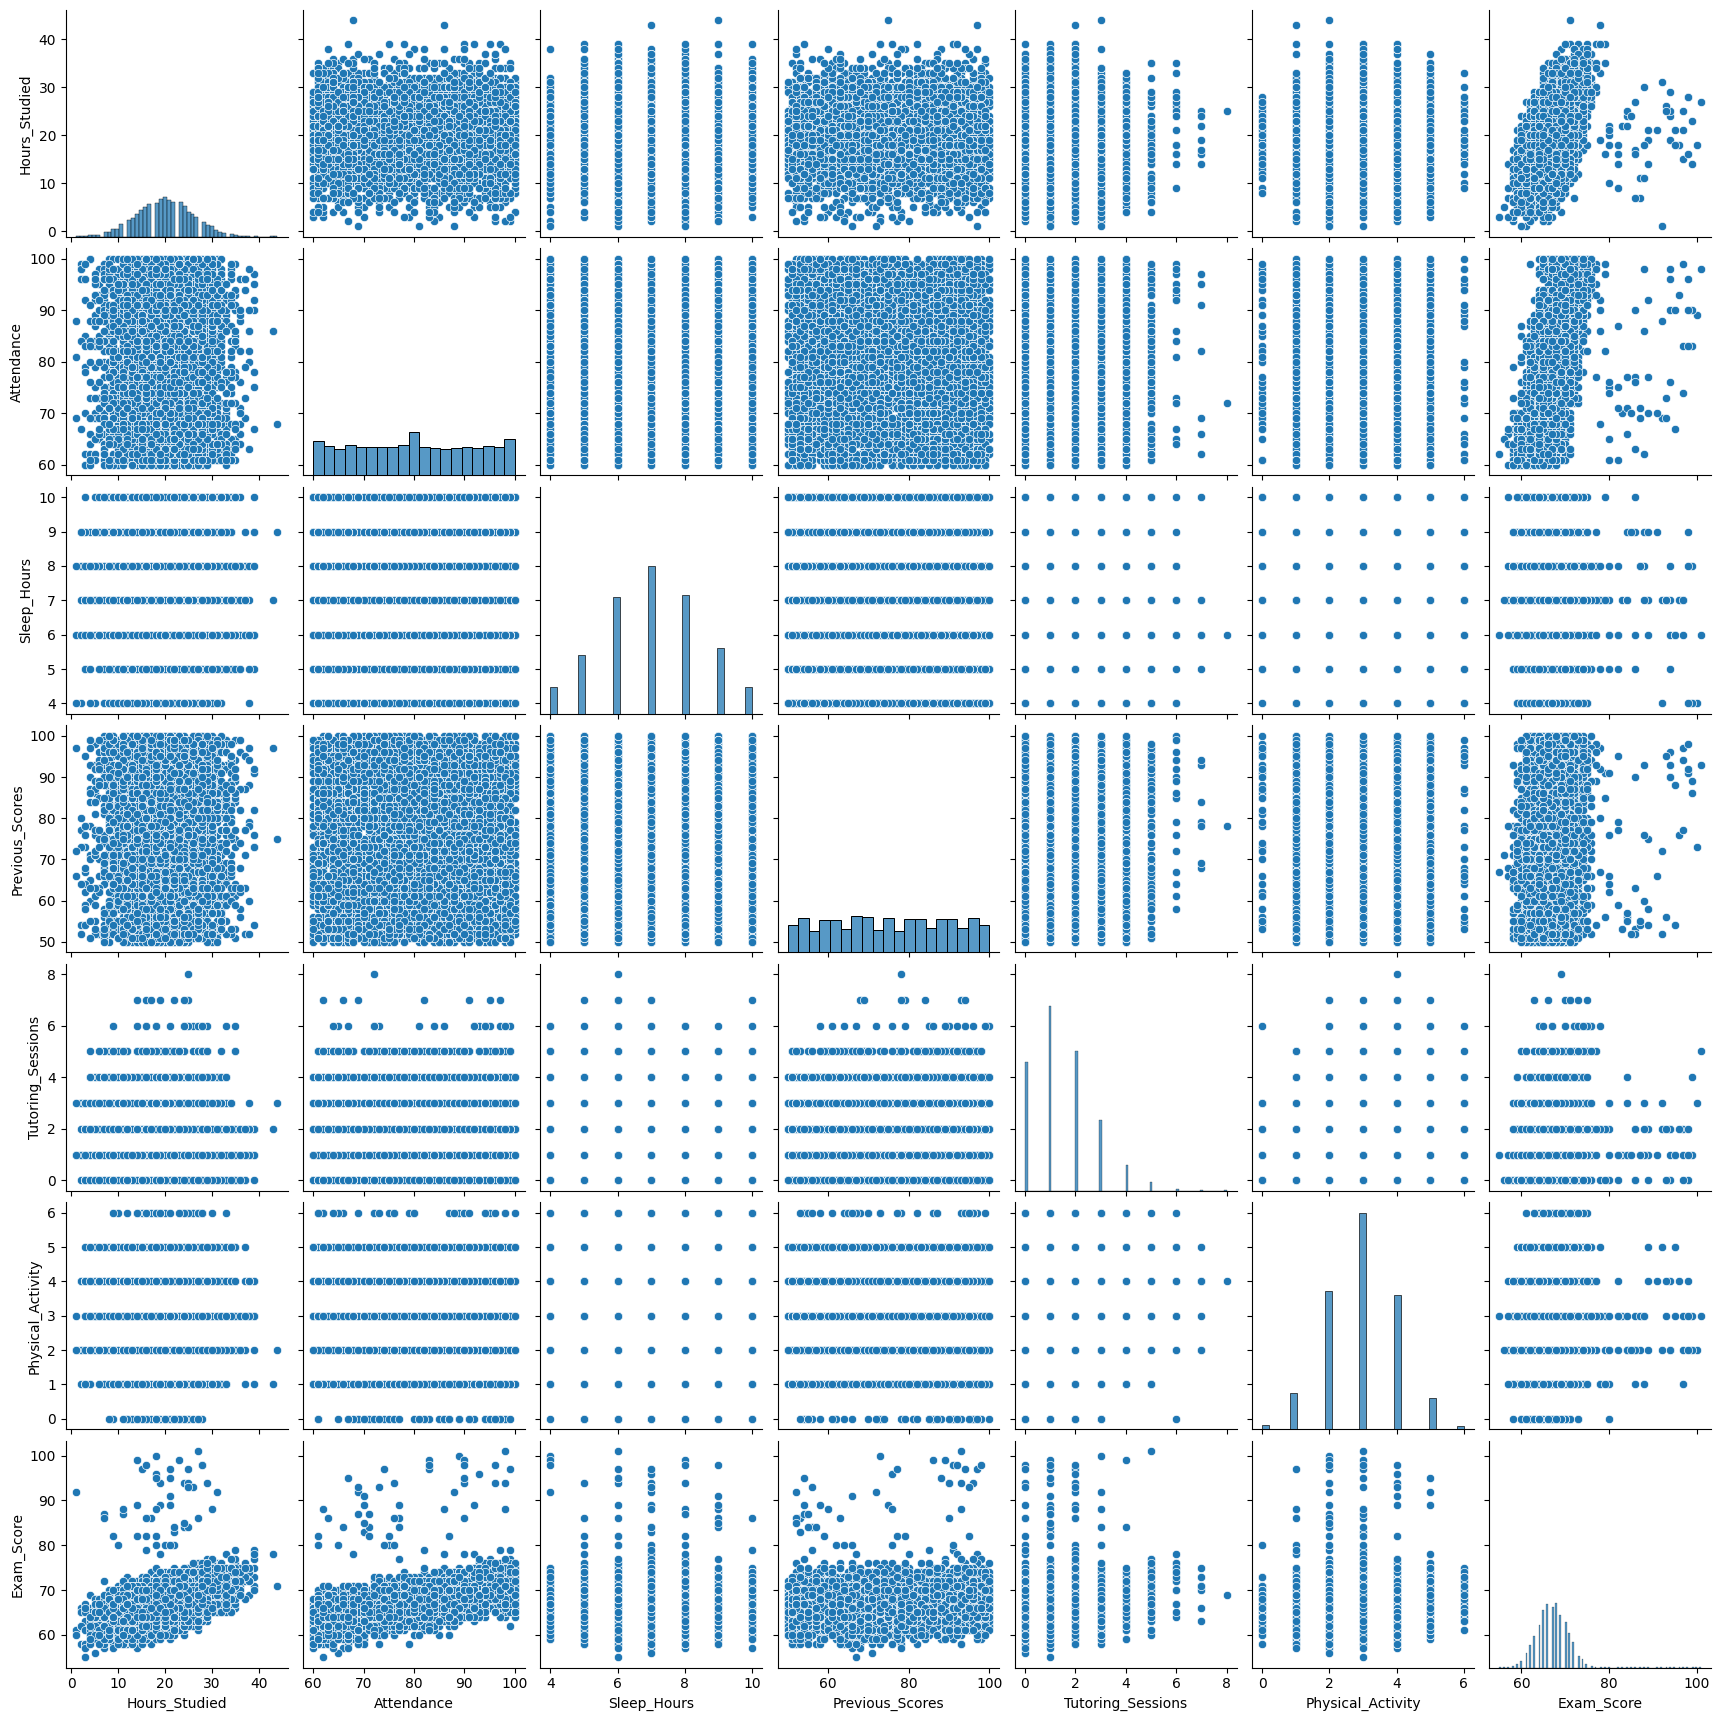

In [5]:
# Hisplot
sns.pairplot(df)
plt.show()

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Sleep_Hours'}>],
       [<Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Physical_Activity'}>],
       [<Axes: title={'center': 'Exam_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

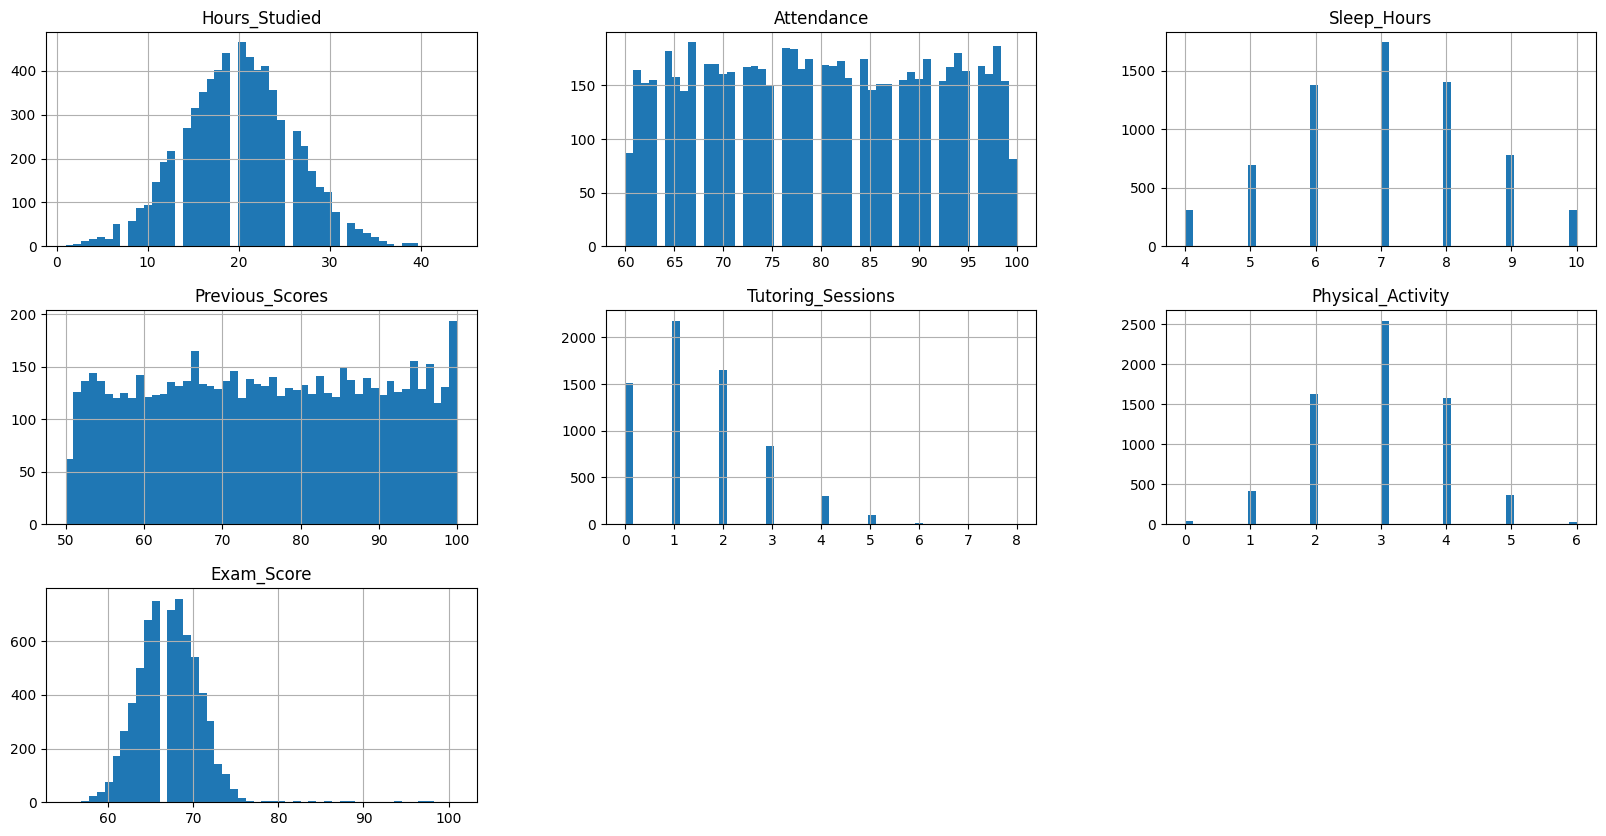

In [6]:
df.hist(figsize=(20,10),bins = 50)

In [7]:
y=df["Exam_Score"]
y=pd.DataFrame(y)
y

,Exam_Score
0,67
1,61
2,74
3,71
4,70
...,...
6602,68
6603,69
6604,68
6605,68


# **Clean the data if necessary**

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [11]:
df = df.dropna()

#**Study the correlation between the features**

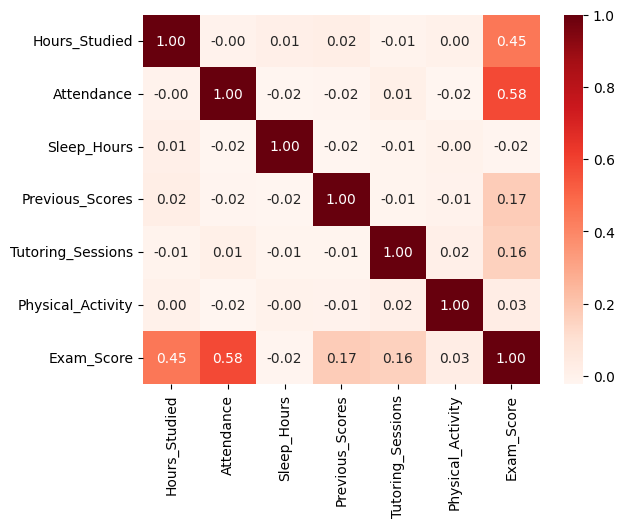

In [12]:
# Define numerical_col here, assuming it should contain numerical columns from df
numerical_col = df.select_dtypes(include=['number']).columns
sns.heatmap(df[numerical_col].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

In [13]:
df_corr = df[['Exam_Score','Attendance']].corr()
print(df_corr)

            Exam_Score  Attendance
Exam_Score    1.000000    0.580259
Attendance    0.580259    1.000000


In [14]:
df_corr = df[['Exam_Score','Hours_Studied']].corr()
print(df_corr)

               Exam_Score  Hours_Studied
Exam_Score       1.000000       0.445104
Hours_Studied    0.445104       1.000000


# **Data Visualization**

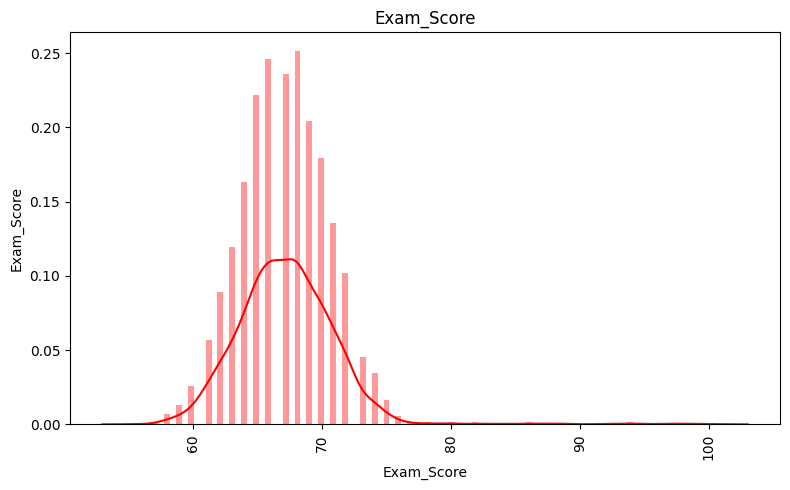

In [15]:
plt.figure(figsize=(8, 5))
sns.distplot(df['Exam_Score'], color='r', bins=100, hist_kws={'alpha': 0.4});
plt.title('Exam_Score')
plt.xticks(rotation=90)
plt.xlabel('Exam_Score')
plt.ylabel('Exam_Score')
plt.tight_layout()
plt.show()

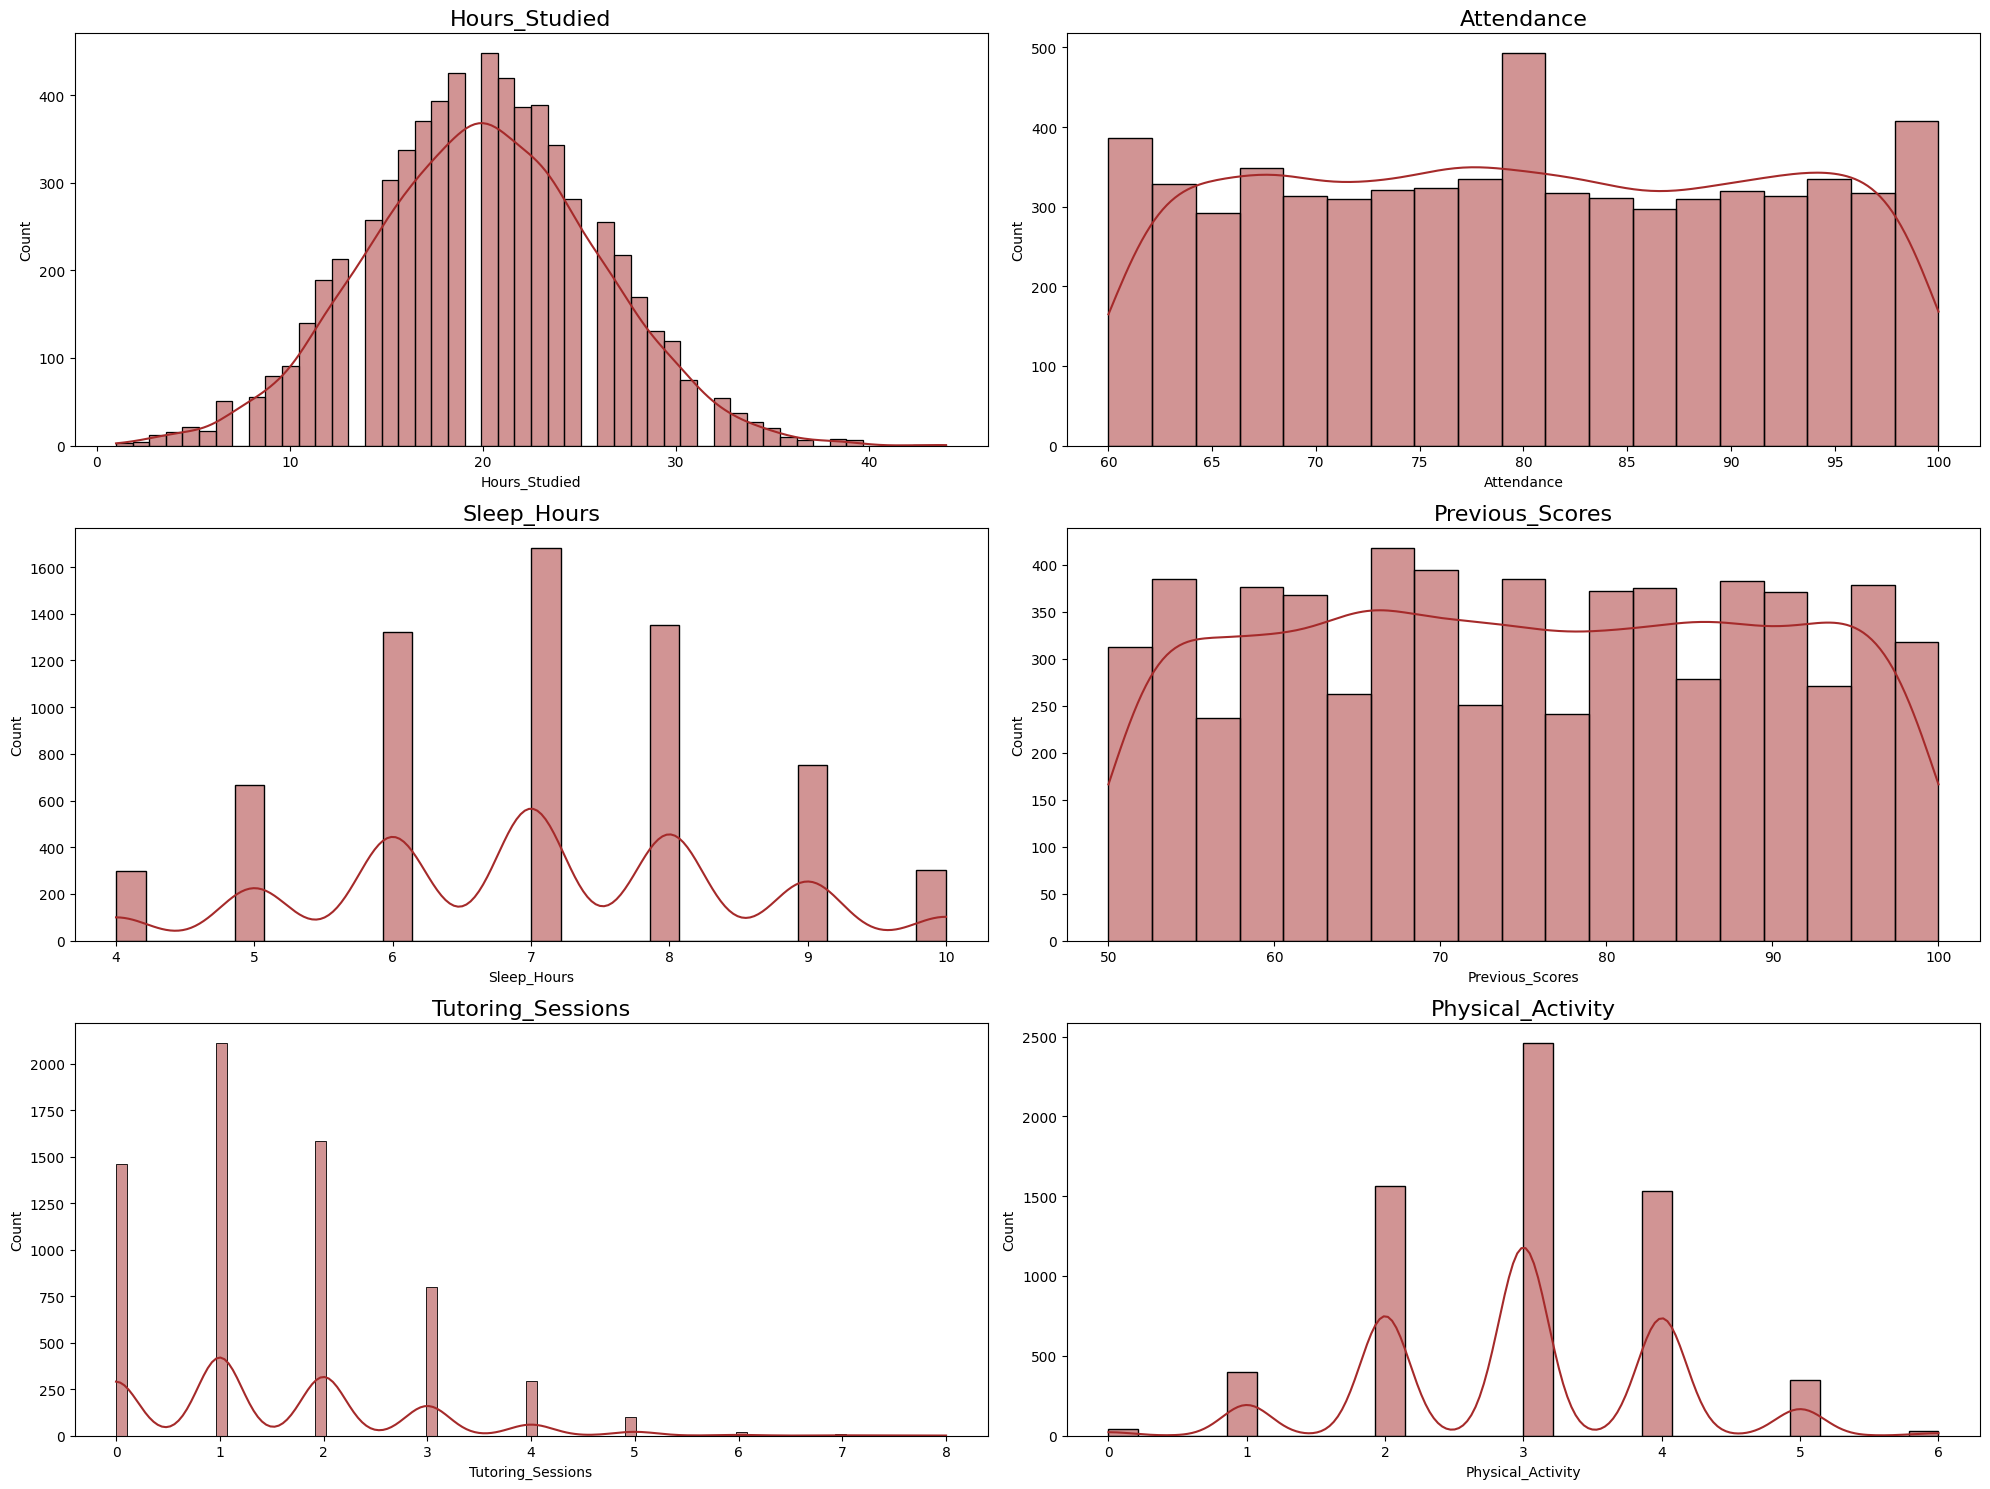

In [16]:
#hist plot for numerical data
plt.figure(figsize=(20,15))

# Define numerical_col here, assuming it should contain numerical columns from df
numerical_col = df.select_dtypes(include=['number']).columns

for i in range(len(numerical_col)-1):
    plt.subplot(3,2,i+1)
    sns.histplot(df[numerical_col[i]],kde=True,color='brown')
    plt.title(numerical_col[i], fontsize=16)
plt.tight_layout()
plt.show()

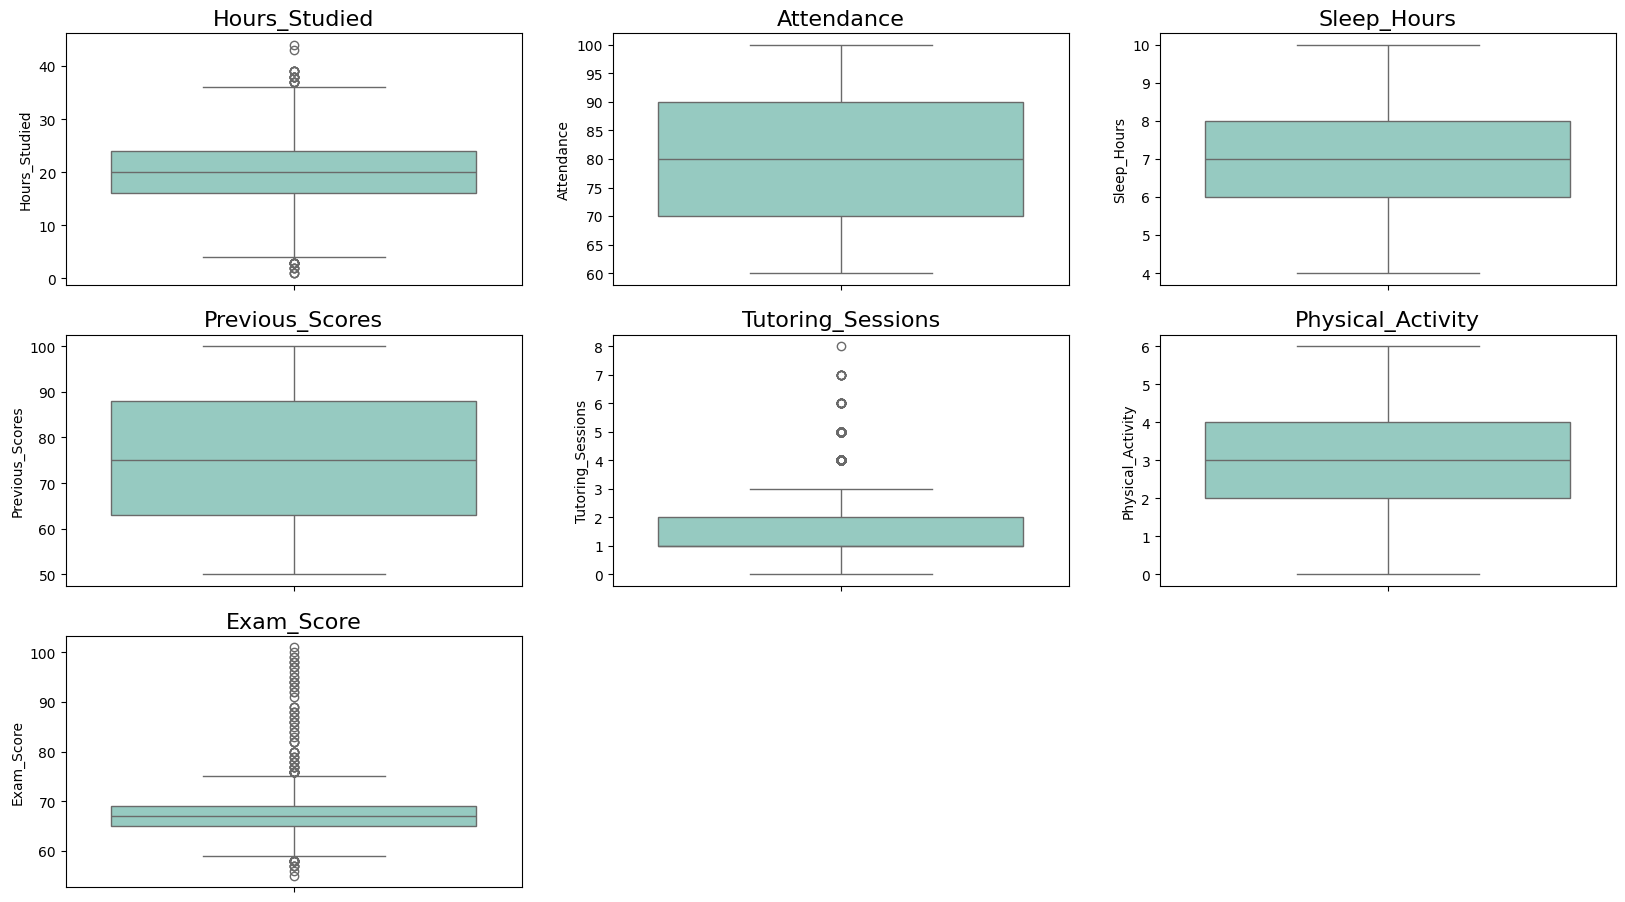

In [17]:
plt.figure(figsize=(20,15))
for i in range(len(numerical_col)):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[numerical_col[i]],palette='Set3')
    plt.title(numerical_col[i], fontsize=16)
# plt.tight_layout()
plt.show()

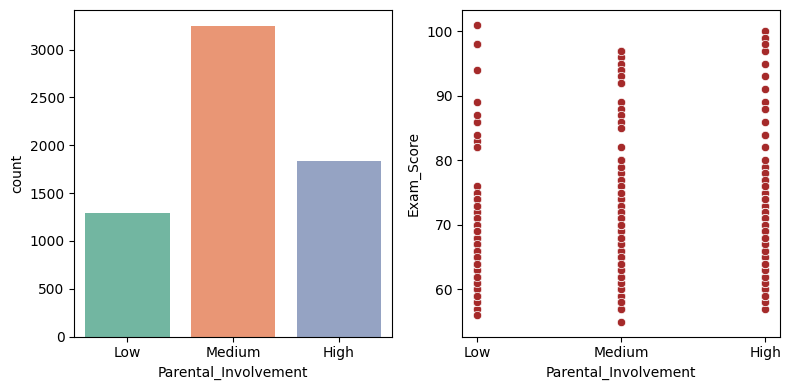

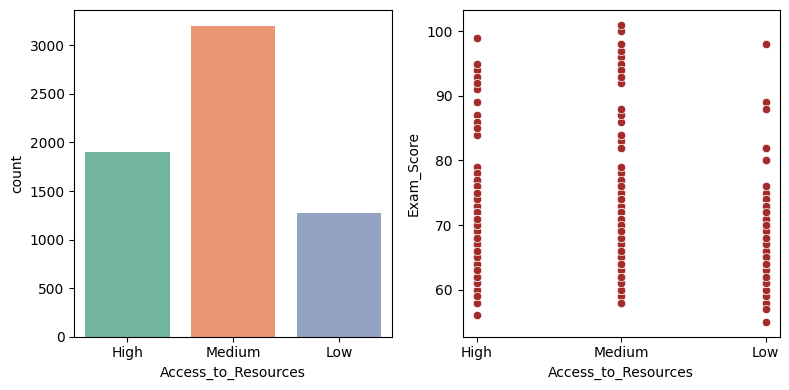

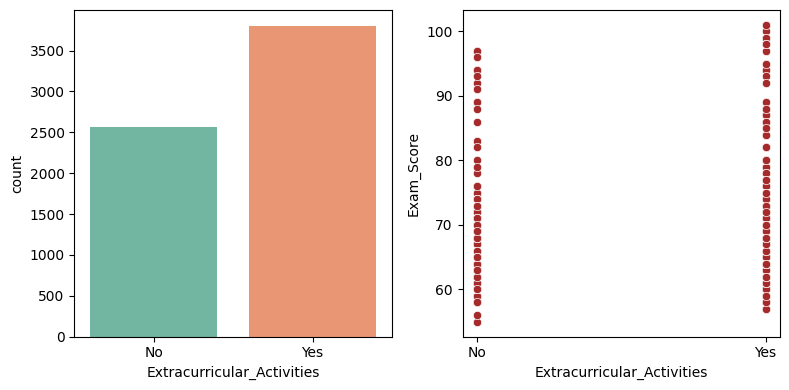

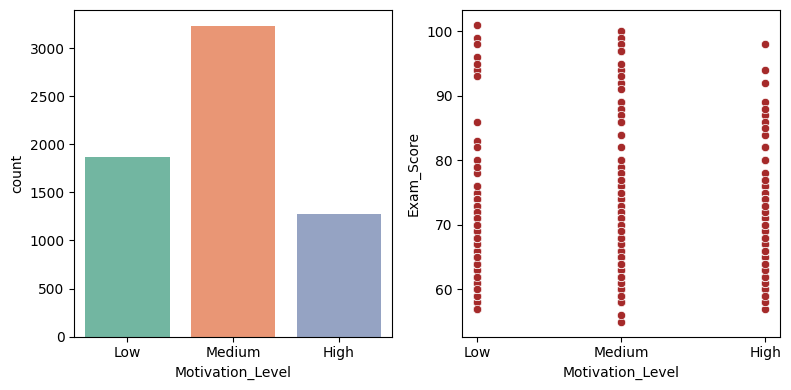

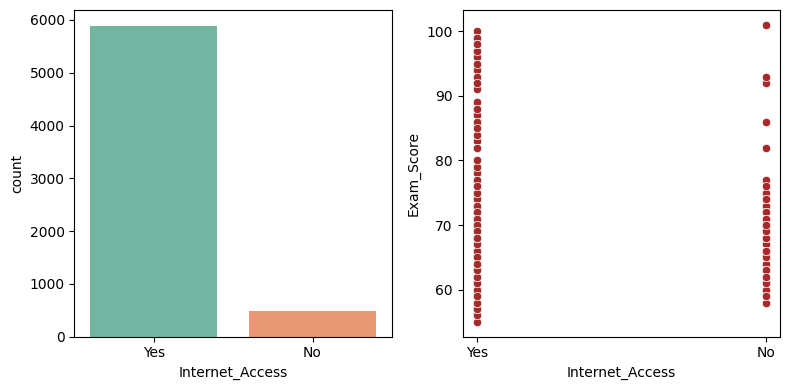

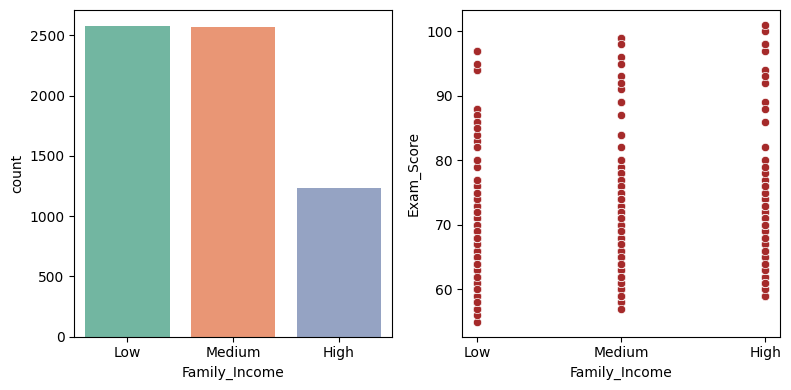

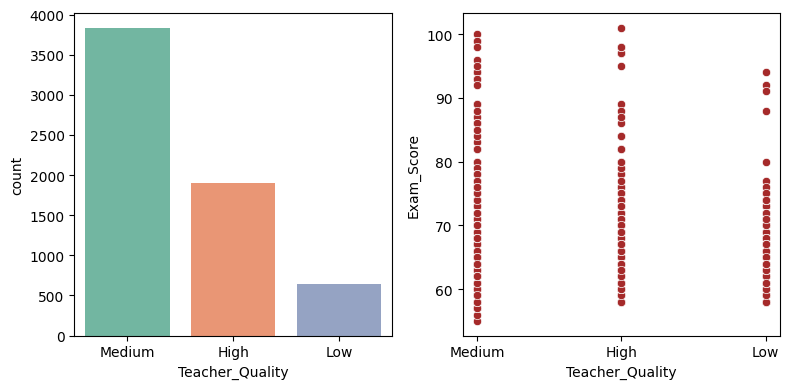

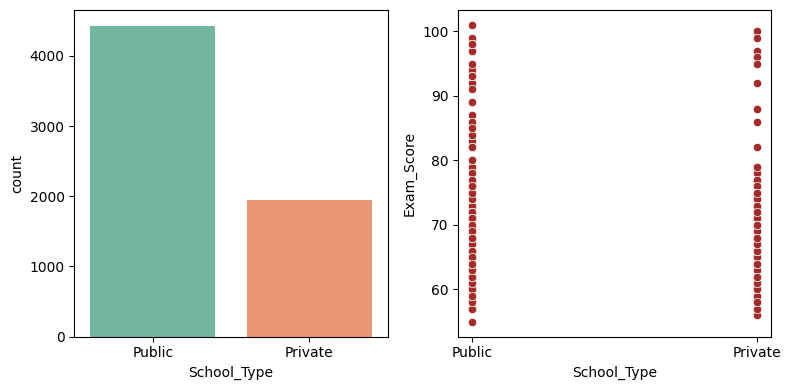

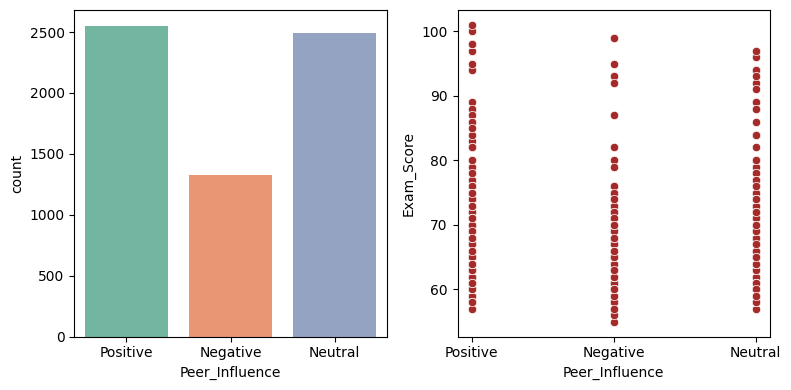

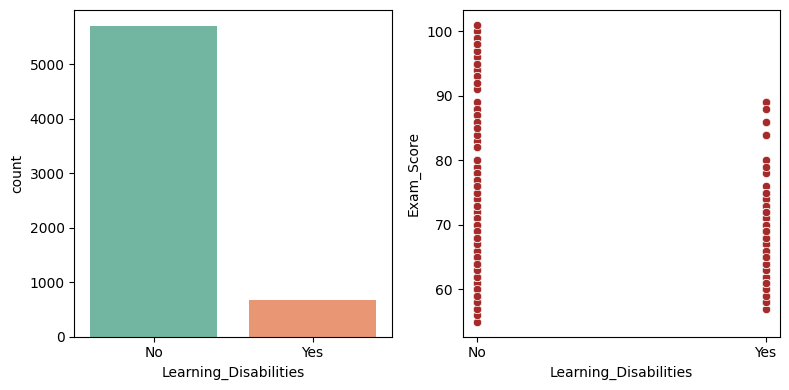

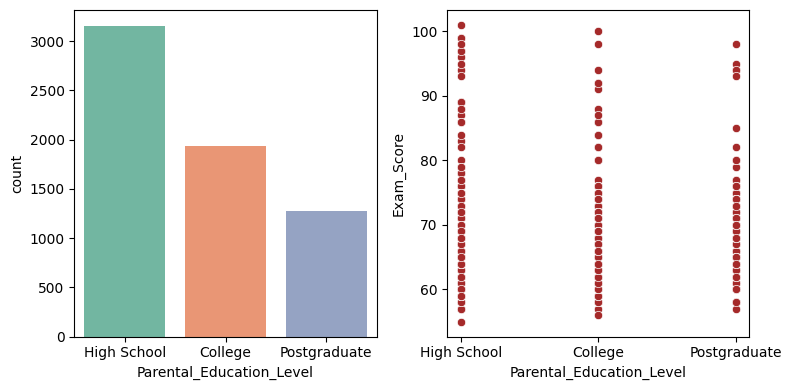

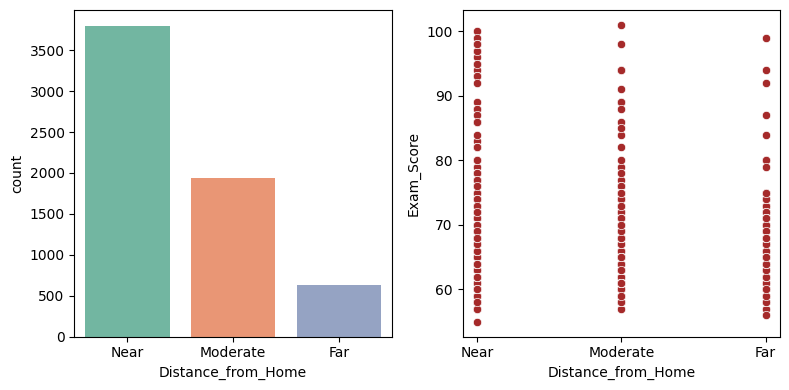

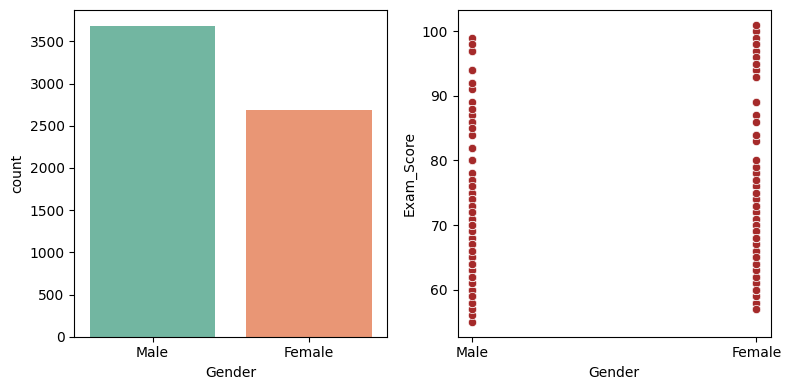

In [18]:
#hist plot for categorical data
categorical_col = df.select_dtypes(include=['object']).columns # Define categorical_col here

for i in range(len(categorical_col)):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[categorical_col[i]],palette='Set2')
    plt.tight_layout()
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df[categorical_col[i]], y=df['Exam_Score'], color='brown')  # If SalePrice or a target variable exists
    plt.tight_layout()
    plt.show()

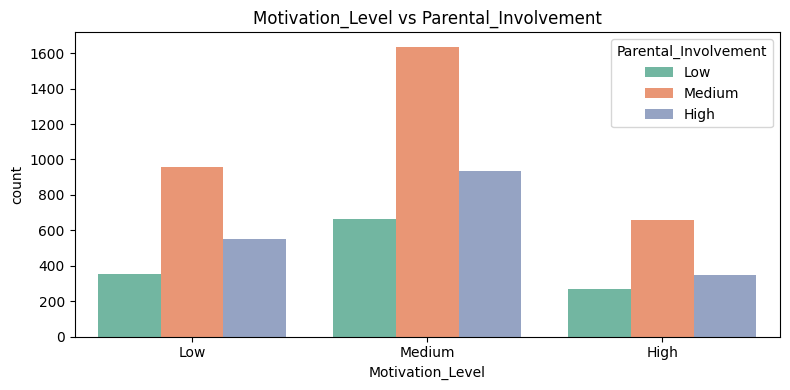

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Motivation_Level'],hue=df['Parental_Involvement'],palette='Set2')
plt.title('Motivation_Level vs Parental_Involvement')
plt.tight_layout()

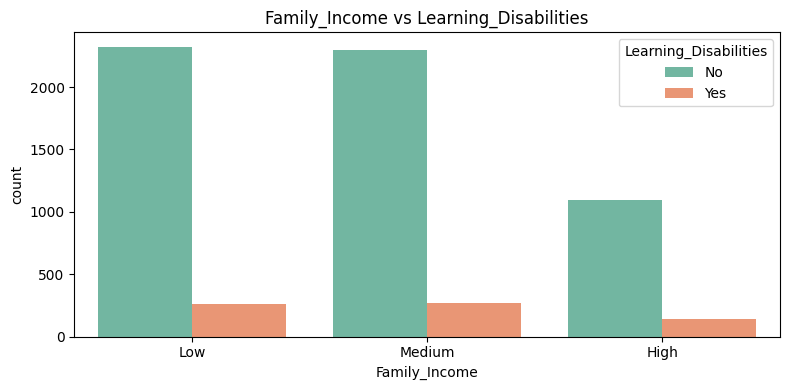

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'],hue=df['Learning_Disabilities'],palette='Set2')
plt.title('Family_Income vs Learning_Disabilities')
plt.tight_layout()

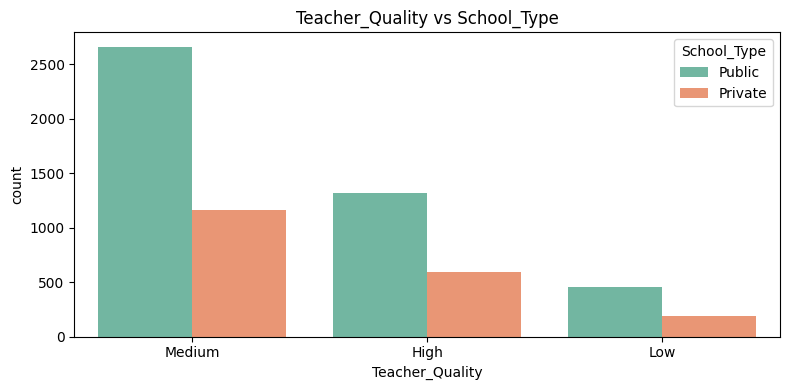

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Teacher_Quality'],hue=df['School_Type'],palette='Set2')
plt.title('Teacher_Quality vs School_Type')
plt.tight_layout()

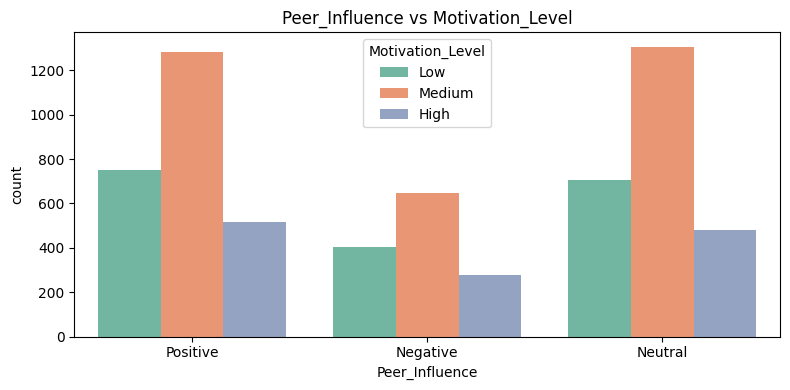

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Peer_Influence'],hue=df['Motivation_Level'],palette='Set2')
plt.title('Peer_Influence vs Motivation_Level')
plt.tight_layout()

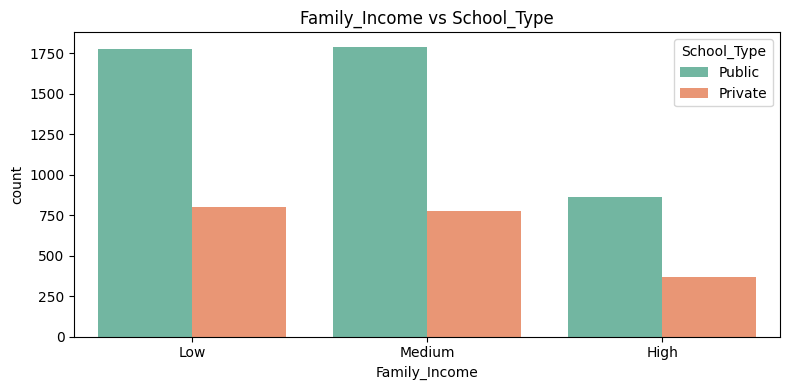

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['Family_Income'],hue=df['School_Type'],palette='Set2')
plt.title('Family_Income vs School_Type')
plt.tight_layout()

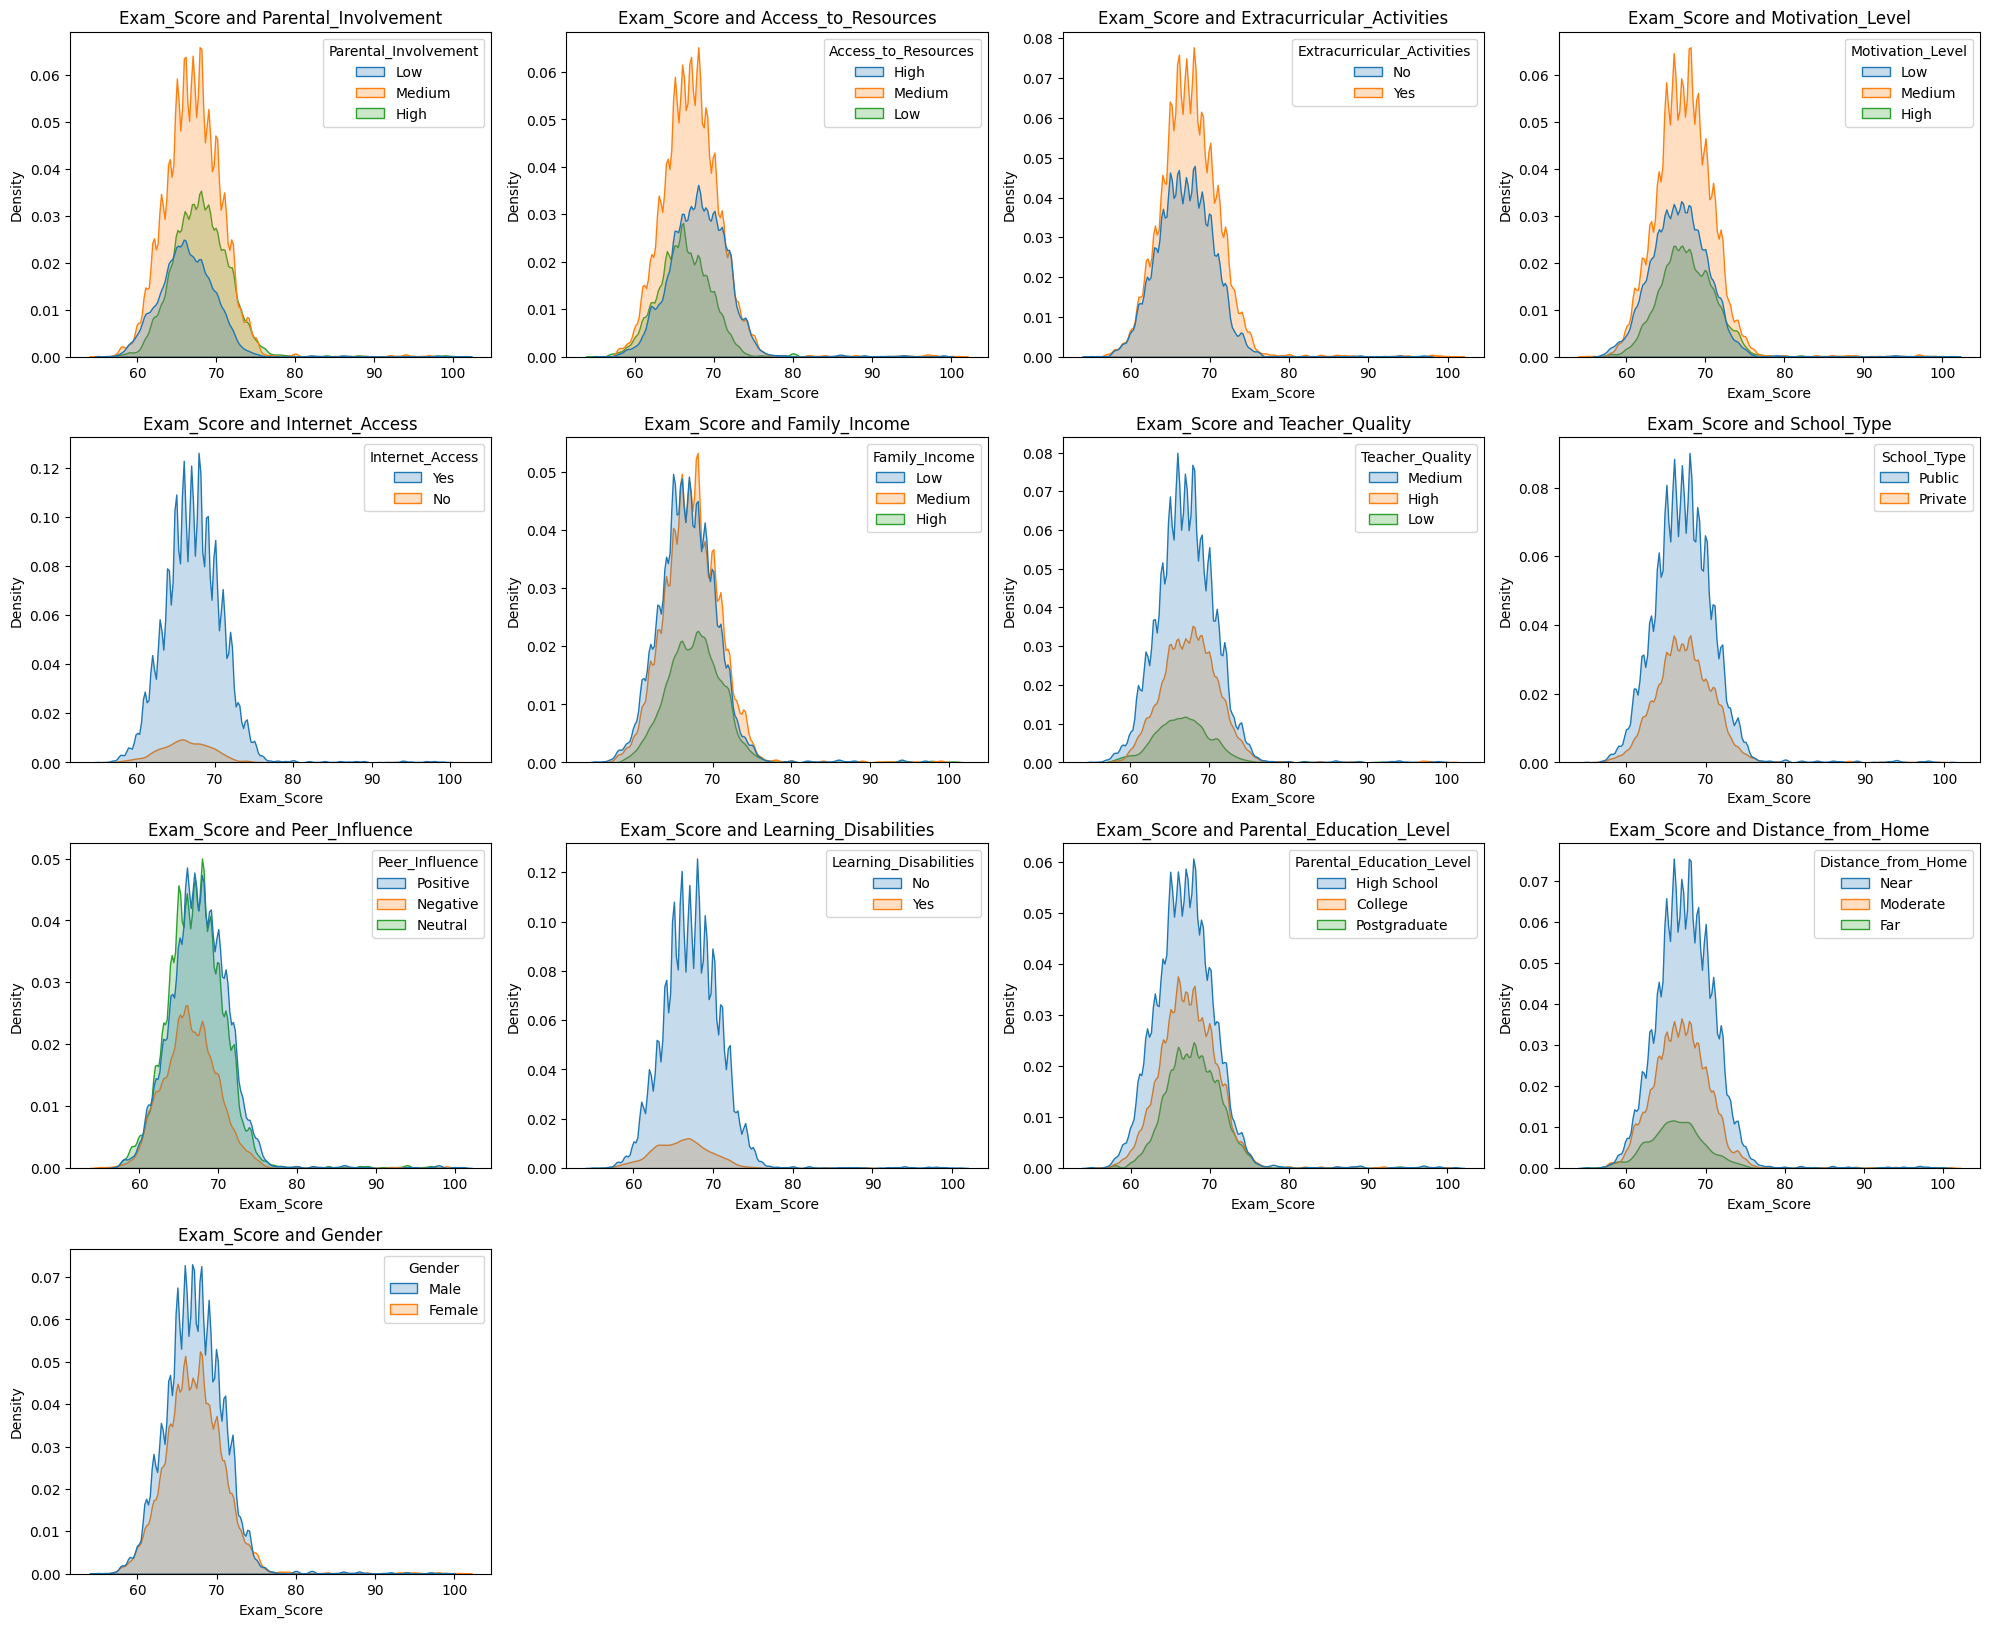

In [24]:
plt.figure(figsize=(20,20))
for i in range(len(categorical_col)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=df['Exam_Score'], hue=df[categorical_col[i]], shade=True, bw_adjust=.5)
    plt.title(f'Exam_Score and {categorical_col[i]}')
    plt.tight_layout()  # Ensure plots don't overlap
plt.show()

# **Data Transformation**

In [29]:
dummy=pd.get_dummies(df[categorical_col],drop_first=True)
dummy.shape

(6378, 21)

In [32]:
df.drop(columns=categorical_col,inplace=True)
data=pd.concat([df,dummy],axis=1)

In [33]:
data.shape

(6378, 28)

# **Split and Train the dataset**

In [34]:
x=data.drop('Exam_Score',axis=1)
y=data['Exam_Score']

In [36]:
# Import the necessary module and class
from sklearn.preprocessing import MinMaxScaler

# Now you can use MinMaxScaler
scalar = MinMaxScaler()
x = scalar.fit_transform(x)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)

(5421, 27)
(957, 27)


# **Linear Regression**

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_squared_error:  4.388116166917117
train_score:  0.7189662733604236
test_score:  0.7343179465189955


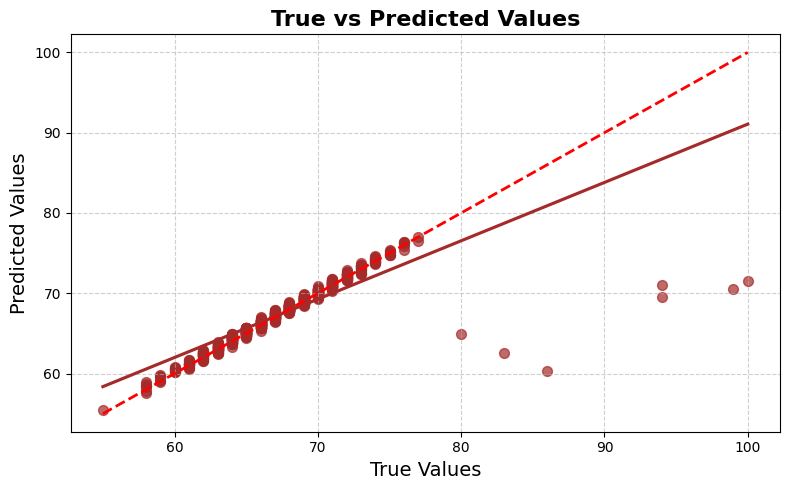

In [43]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **Random Forest Regressor**

In [46]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",rf.score(x_train,y_train))
print("test_score: ",rf.score(x_test,y_test))

mean_squared_error:  6.6353412748171365
train_score:  0.9462547750313015
test_score:  0.5982578791483529


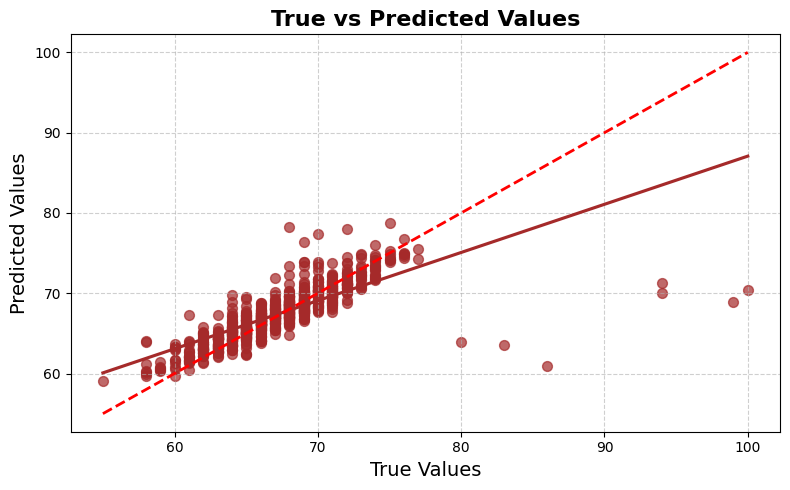

In [47]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **XGBoost**

In [52]:
!pip install xgboost
#Import the xgboost library
import xgboost
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",xgb.score(x_train,y_train))
print("test_score: ",xgb.score(x_test,y_test))

mean_squared_error:  5.844127090132067
train_score:  0.972470464679809
test_score:  0.646162583885947


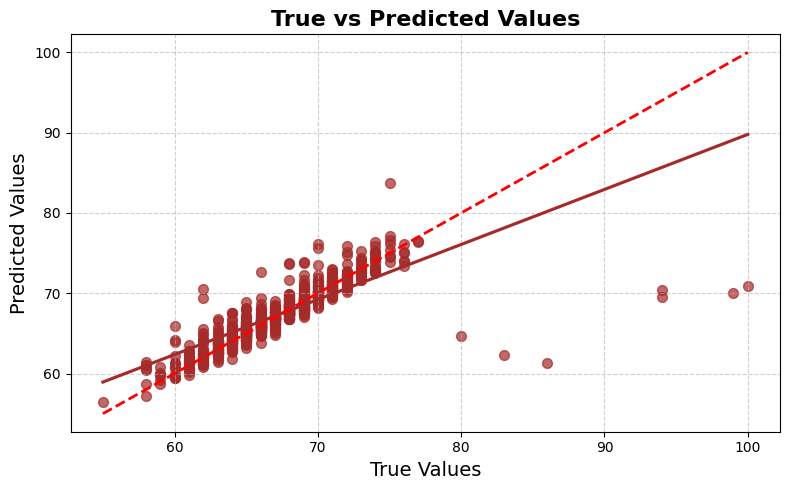

In [53]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **Ridge Regression**

In [56]:
!pip install scikit-learn
from sklearn.linear_model import Ridge # import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

print("mean_squared_error (Ridge): ", mean_squared_error(y_test, y_pred_ridge))
print("train_score (Ridge): ", ridge.score(x_train, y_train))
print("validation_score (Ridge): ", ridge.score(x_test, y_test))

mean_squared_error (Ridge):  4.389275980363372
train_score (Ridge):  0.7189435856463309
validation_score (Ridge):  0.7342477246729152


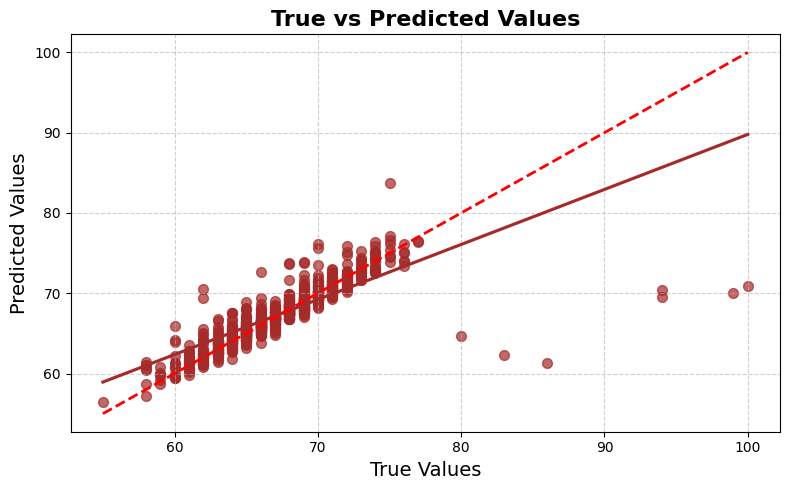

In [57]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **Support Vector Regression (SVR)**

In [59]:
!pip install scikit-learn
from sklearn.svm import SVR # import the SVR class from scikit-learn

svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",svr.score(x_train,y_train))
print("test_score: ",svr.score(x_test,y_test))

mean_squared_error:  4.46209660149883
train_score:  0.7183271079981106
test_score:  0.7298387410856317


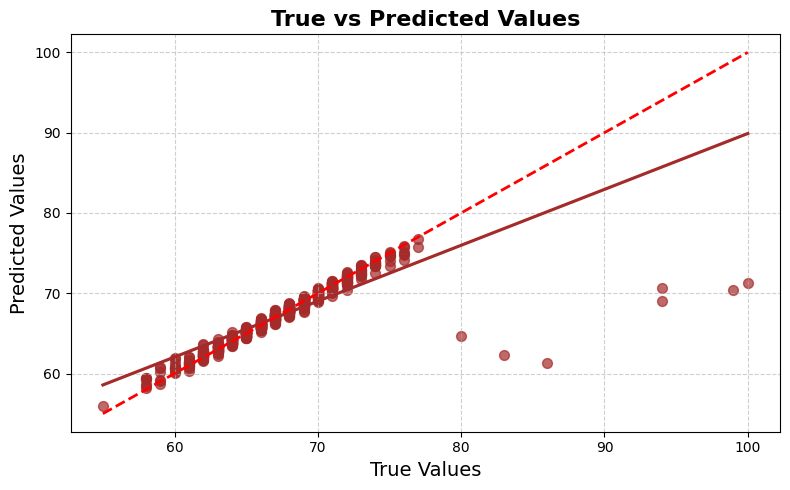

In [60]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='brown', marker='o', scatter_kws={'s':50, 'alpha':0.7})

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# **Bayesian Linear Regression**

In [64]:
# prompt: Bayesian Linear Regression

from sklearn.linear_model import BayesianRidge

# Create a Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()

# Fit the model to the training data
bayesian_ridge.fit(x_train, y_train)

# Make predictions on the test data
y_pred_bayesian = bayesian_ridge.predict(x_test)

# Evaluate the model
print("mean_squared_error (Bayesian Ridge): ", mean_squared_error(y_test, y_pred_bayesian))
print("train_score (Bayesian Ridge): ", bayesian_ridge.score(x_train, y_train))
print("validation_score (Bayesian Ridge): ", bayesian_ridge.score(x_test, y_test))

mean_squared_error (Bayesian Ridge):  4.388533505946926
train_score (Bayesian Ridge):  0.7189619254374975
validation_score (Bayesian Ridge):  0.7342926783888414


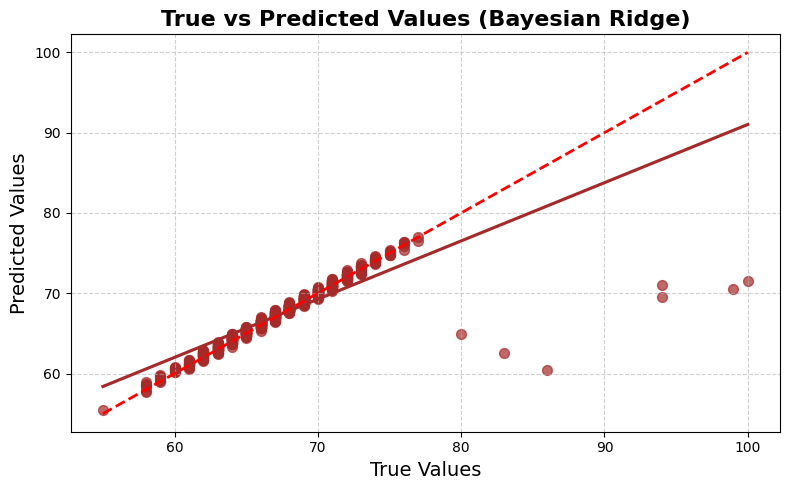

In [65]:
# Plot the true vs predicted values
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred_bayesian, ci=None, color='brown', marker='o', scatter_kws={'s': 50, 'alpha': 0.7})

max_val = max(max(y_test), max(y_pred_bayesian))
min_val = min(min(y_test), min(y_pred_bayesian))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('True vs Predicted Values (Bayesian Ridge)', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


# **Models Comparison**

In [76]:
mse=[]
names=['Linear Regression','Random Forest Regressor','XGB','Ridge','SVR','Bayesian Linear Regression']
mse.extend([lr.score(x_test,y_test),rf.score(x_test,y_test),xgb.score(x_test,y_test),ridge.score(x_test,y_test),svr.score(x_test,y_test), bayesian_ridge.score(x_test, y_test)])
mse

[0.7343179465189955,
 0.5982578791483529,
 0.646162583885947,
 0.7342477246729152,
 0.7298387410856317,
 0.7342926783888414]

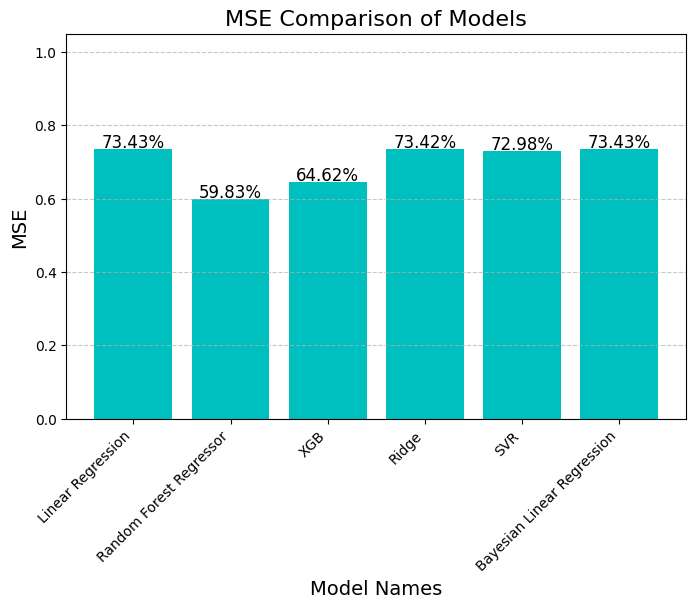

In [77]:
plt.figure(figsize=(8,5))

plt.bar(names, acc, color='c')
plt.title('MSE Comparison of Models', fontsize=16)
plt.xlabel('Model Names', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(acc):
    plt.text(i, value + 0.005 , f'{value*100:.2f}%', ha='center', fontsize=12, color='black')

plt.ylim(0, 1.05)

plt.xticks(rotation=45, ha='right')
plt.show()

# **Explaination**

* Based on the comparison of the 6 models, we can see Linear Regression and Bayesian Linear Regression models give the most accurate result compared to all the other models at 73.43%.
* Random Forest model shows the lowest accuracy which is 59.83%.
